In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.metrics import recall_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pickle
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
data = pd.read_csv("../input/parkinson-disease-detection/Parkinsson disease.csv")

In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
data.describe(include="all")

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S01_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


#### <u>As we can see from the summary above, there are differences in the scale between the features. Normalizing the data will be a part of the Pre-Processing pipeline.

In [8]:
#Checking for missing and duplicated data
print("missing_data =",data.isnull().sum().max())
print("duplicated_data =",data.duplicated().sum())

missing_data = 0
duplicated_data = 0


#### -Jitter and shimmer are acoustic characteristics of voice signals, and they are caused by irregular vocal fold vibration. They are perceived as roughness, breathiness, or hoarseness in a speaker's voice

In [9]:
#renaming variables for simpler observing
data.rename(columns=({'MDVP:Fo(Hz)':'avg_freq', 'MDVP:Fhi(Hz)':'max_freq', 'MDVP:Flo(Hz)':'min_freq', 'MDVP:Jitter(%)':'var_freq1',
       'MDVP:Jitter(Abs)':'var_freq2', 'MDVP:RAP':'var_freq3', 'MDVP:PPQ':'var_freq4', 'Jitter:DDP':'var_freq5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer(dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)

In [10]:
data.drop(columns="name",axis=1,inplace=True)
data

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [11]:
#re-ordering the columns
col_names = ['avg_freq',
 'max_freq',
 'min_freq',
 'var_freq1',
 'var_freq2',
 'var_freq3',
 'var_freq4',
 'var_freq5',
 'var_amp1',
 'var_amp2',
 'var_amp3',
 'var_amp4',
 'var_amp5',
 'var_amp6',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE',
 'status']
data = data.reindex(columns=col_names)

In [12]:
data.head()

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


<AxesSubplot:xlabel='status', ylabel='count'>

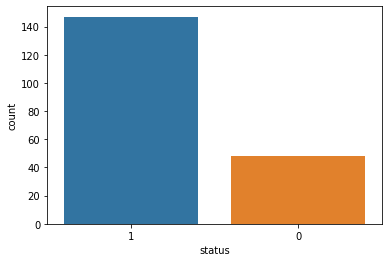

In [13]:
#Visualizing the target column "status"
sns.countplot(x = 'status',
              data = data,
              order = data['status'].value_counts().index)

##### -Since we are dealing with an unbalanced dataset we will be using OverSampling techniques becuase we are dealing with a small dataset, and we can't risk losing alot of information using another technique.
##### <u>-We will come back to this part after the EDA and Preprocessing

In [14]:
def dist_plot(data):
    """Shows distribution plots for the dataframe

        Args:
            data(DataFrame): dataframe of the current data

        Returns:
            Matplotlib axes containing the plot: distribution plots of the dataframe
    """
    grid_size = (10,4)
    fig_size = (12, 20)
    fig = plt.figure(figsize = fig_size)
    column_names = data.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        plot = sns.histplot(data[column_name], kde = True, color = 'Green')
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

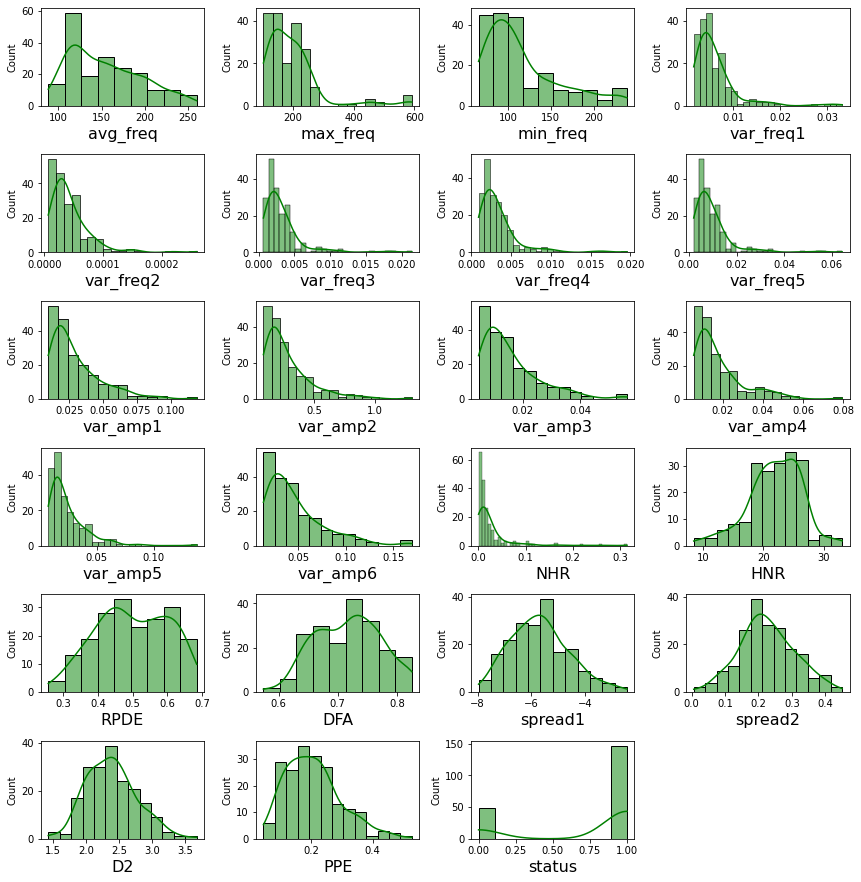

In [15]:
dist_plot(data)

In [16]:
#checking for data skewness
data.skew().sort_values(ascending=False)

NHR          4.220709
var_freq5    3.362058
var_freq3    3.360708
var_freq1    3.084946
var_freq4    3.073892
var_freq2    2.649071
var_amp5     2.618047
max_freq     2.542146
var_amp2     1.999389
var_amp4     1.798697
var_amp1     1.666480
var_amp6     1.580618
var_amp3     1.580576
min_freq     1.217350
PPE          0.797491
avg_freq     0.591737
spread1      0.432139
D2           0.430384
spread2      0.144430
DFA         -0.033214
RPDE        -0.143402
HNR         -0.514317
status      -1.187727
dtype: float64

#### <u> As we can see from the distribution plots and skewness funtion, that we are dealing with alot of skewed data with outliers.

In [17]:
def cor_matrix(data):
    """Creates correlation matrix for the dataframe 

        Args:
            data(DataFrame): dataframe of the current data

        Prints:
            array: columns with high correlation above threshold
            
        Returns:
            DataFrame: correlation matrix
    """
    corr=data.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,annot=True,cmap='OrRd')
    plt.show()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
    print('Columns that have high correlation and should be dropped excluding one of them:',to_drop)
    return corr

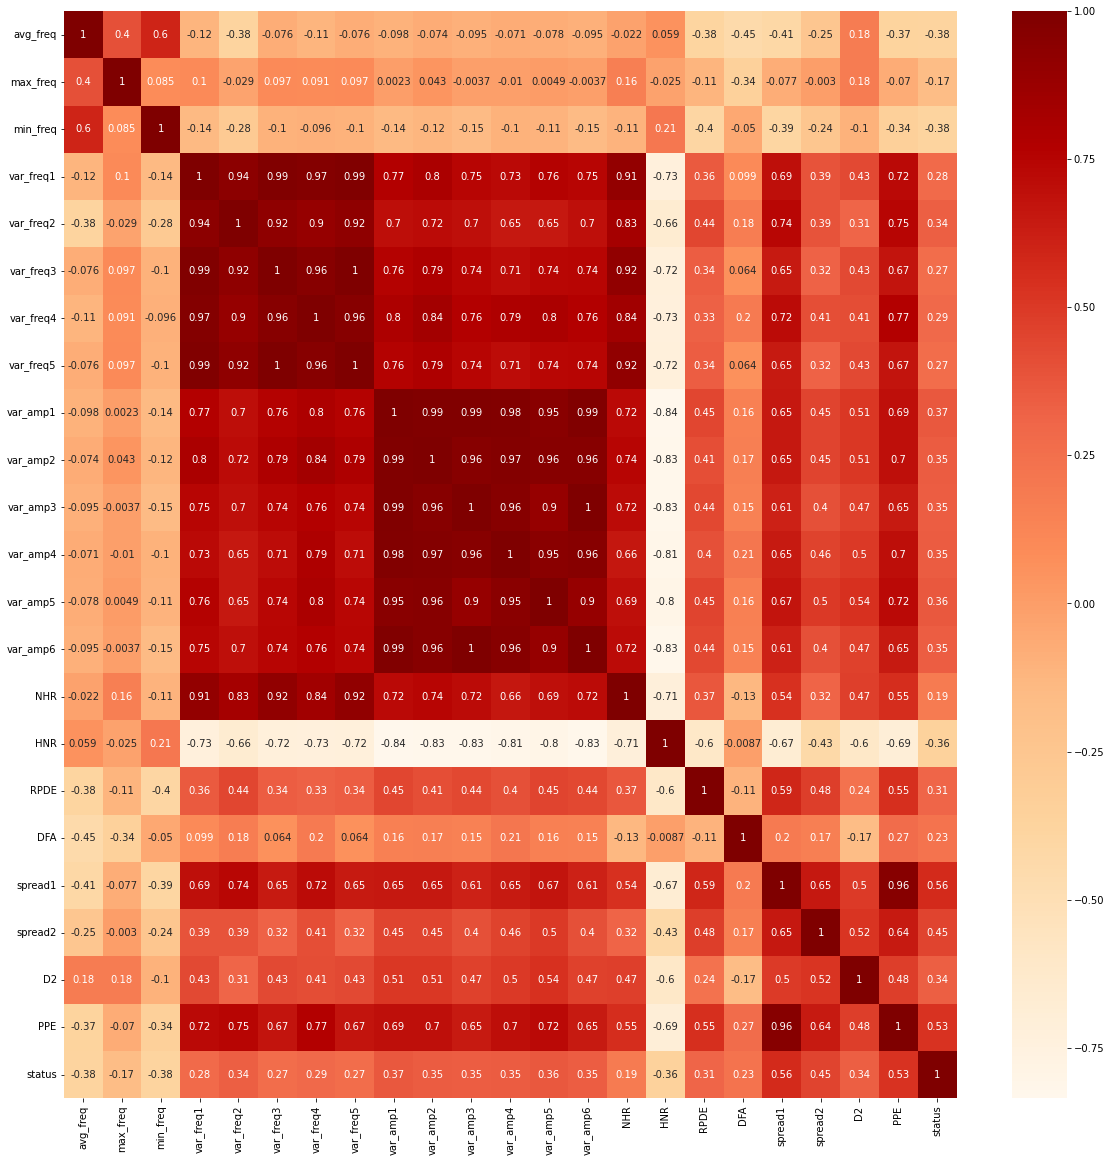

Columns that have high correlation and should be dropped excluding one of them: ['var_freq2', 'var_freq3', 'var_freq4', 'var_freq5', 'var_amp2', 'var_amp3', 'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'PPE']


In [18]:
w = cor_matrix(data)

#### <u> As we can see from the correlation matrix above, the variance variables in amp and freq are highly correlated as said in the description, they are diffirent measurements of the same features.

In [19]:
#printing features most correlated to the target column
status_corr = w.sort_values(by='status', ascending = False).iloc[:,-1]
status_corr

status       1.000000
spread1      0.564838
PPE          0.531039
spread2      0.454842
var_amp1     0.367430
var_amp5     0.364316
var_amp4     0.351148
var_amp2     0.350697
var_amp3     0.347617
var_amp6     0.347608
D2           0.340232
var_freq2    0.338653
RPDE         0.308567
var_freq4    0.288698
var_freq1    0.278220
var_freq3    0.266668
var_freq5    0.266646
DFA          0.231739
NHR          0.189429
max_freq    -0.166136
HNR         -0.361515
min_freq    -0.380200
avg_freq    -0.383535
Name: status, dtype: float64

#### <u> In the output above these are the most effective features in correlation to the status variable

In [20]:
#dropping the highly correlated columns except one
columns_names = ['var_freq2', 'var_freq3', 'var_freq4', 'var_freq5', 'var_amp2', 'var_amp3', 'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'PPE']
data.drop(columns=columns_names,axis=1,inplace=True)
data

,avg_freq,max_freq,min_freq,var_freq1,var_amp1,HNR,RPDE,DFA,spread1,spread2,D2,status
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,1
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,1
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,1
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,1
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,1
...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0


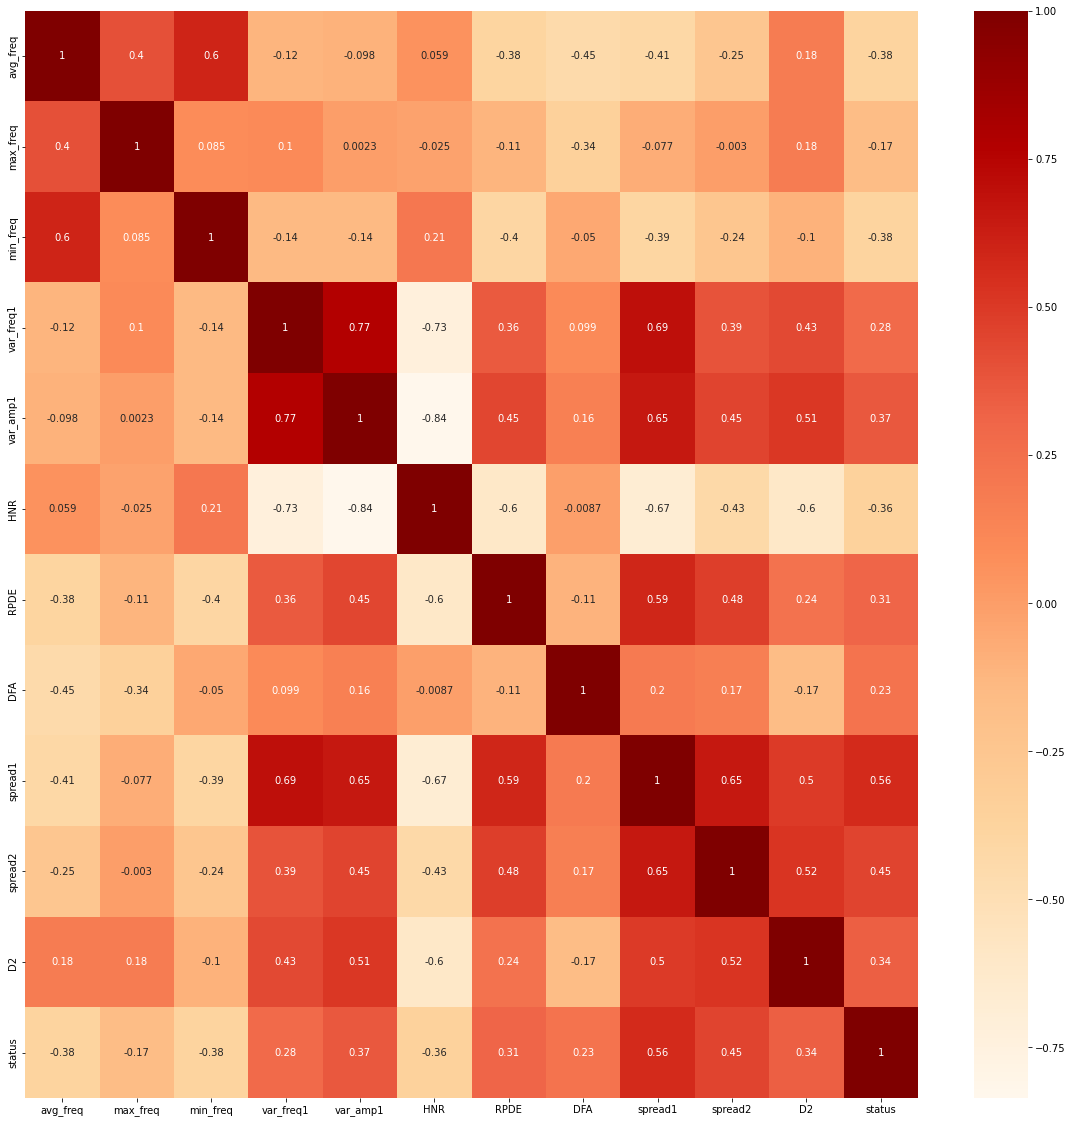

Columns that have high correlation and should be dropped excluding one of them: []


In [21]:
#ploting correlation matrix after deleting correlated columns
tmp = cor_matrix(data)

In [22]:
status_corr = tmp.sort_values(by='status', ascending = False).iloc[:,-1]
status_corr

status       1.000000
spread1      0.564838
spread2      0.454842
var_amp1     0.367430
D2           0.340232
RPDE         0.308567
var_freq1    0.278220
DFA          0.231739
max_freq    -0.166136
HNR         -0.361515
min_freq    -0.380200
avg_freq    -0.383535
Name: status, dtype: float64

##### <u> Now that are we done with the correlation part, we start dealing with skewed data and then we will start choosing our baseline,dealing with unbalanced classes, and our optimization.

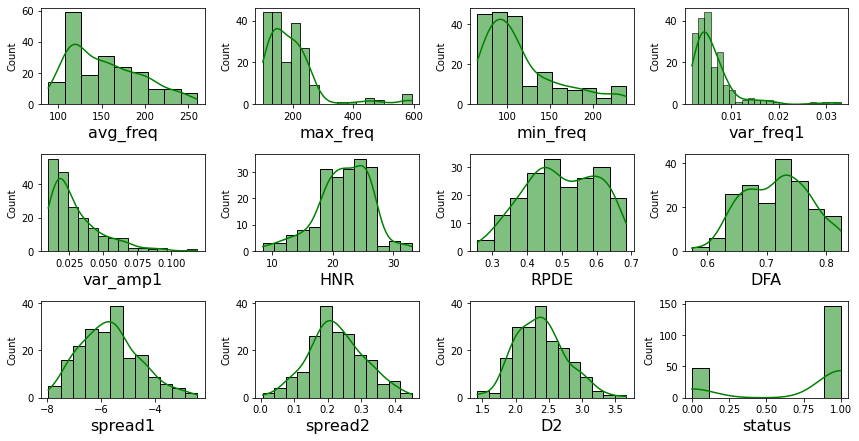

In [23]:
dist_plot(data)

In [24]:
data.skew().sort_values(ascending=False)

var_freq1    3.084946
max_freq     2.542146
var_amp1     1.666480
min_freq     1.217350
avg_freq     0.591737
spread1      0.432139
D2           0.430384
spread2      0.144430
DFA         -0.033214
RPDE        -0.143402
HNR         -0.514317
status      -1.187727
dtype: float64

##### <u> Dealing with outliars

In [25]:
##In this part we start neglecting outliars to reduce the error variance
df = data[data.var_freq1<=0.010]
df2 = df[df.max_freq<=300]
df3 = df2[df2.var_amp1<=0.075]

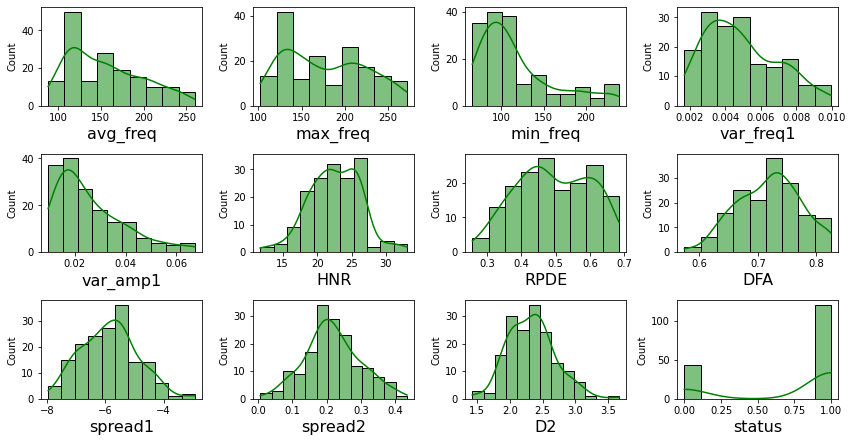

In [26]:
dist_plot(df3)

In [27]:
df3.describe(include='all')

,avg_freq,max_freq,min_freq,var_freq1,var_amp1,HNR,RPDE,DFA,spread1,spread2,D2,status
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,155.055842,177.978091,117.775042,0.004920,0.026118,22.601436,0.492786,0.719339,-5.856604,0.217376,2.331977,0.733333
std,42.996747,47.138671,44.666448,0.002067,0.013560,3.791338,0.107139,0.054320,0.972492,0.080898,0.361769,0.443563
min,88.333000,102.145000,65.476000,0.001680,0.009540,11.744000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.000000
25%,117.226000,132.068000,86.180000,0.003310,0.016080,19.979000,0.413295,0.678874,-6.547148,0.171088,2.058658,0.000000
50%,149.689000,166.607000,104.680000,0.004550,0.021990,22.603000,0.487407,0.723797,-5.845099,0.210279,2.322511,1.000000
75%,184.055000,215.293000,138.990000,0.006380,0.032730,25.429000,0.585169,0.759320,-5.288912,0.264967,2.536527,1.000000
max,260.105000,272.210000,239.170000,0.009970,0.067270,33.047000,0.685151,0.825069,-2.929379,0.434326,3.671155,1.000000


#### <u> We start applying StandardScaler as we have various measurments with different scales

In [28]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df3)
dataset = pd.DataFrame(scaled,columns = df3.columns)

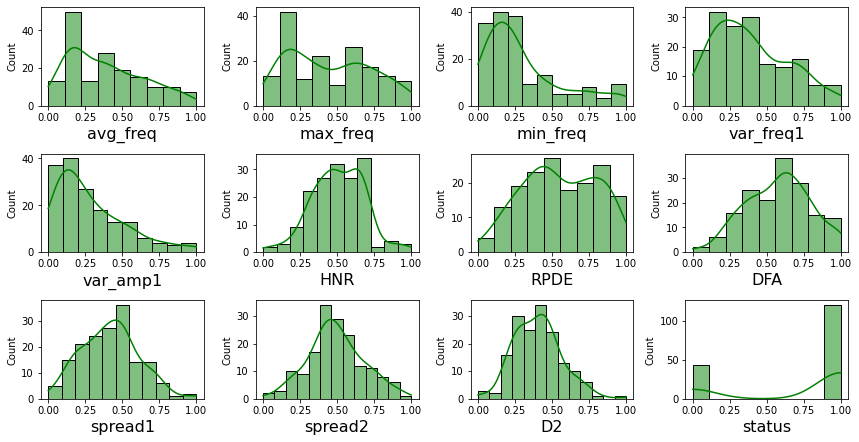

In [29]:
dist_plot(dataset)

In [30]:
dataset.skew().sort_values(ascending=False)

min_freq     1.236476
var_amp1     1.151574
avg_freq     0.578739
var_freq1    0.557216
D2           0.477432
spread1      0.290946
max_freq     0.271053
spread2      0.147347
HNR         -0.080312
RPDE        -0.083814
DFA         -0.132529
status      -1.064996
dtype: float64

## <u> Creating baseline & GridSearch

##### Splitting the dataset

In [31]:
y = dataset['status']
X = dataset.drop(['status'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=45)

##### Creating RandomForestClasifier as it is the best f1 score for the negative class

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, y_train)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

array([0.95      , 1.        , 1.        , 1.        , 0.93333333])

In [34]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_no_up = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

#### F1 matrix

In [35]:
print(classification_report(y_test, grid_no_up.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78        13
         1.0       0.88      0.97      0.92        29

    accuracy                           0.88        42
   macro avg       0.89      0.83      0.85        42
weighted avg       0.88      0.88      0.88        42



In [36]:
filename = 'RF_BaseClassifier.sav'
pickle.dump(grid_no_up.best_estimator_, open(filename, 'wb'))

### <u> Using Smote for OverSampling the CrossValidation set & GridSearch

In [37]:
from imblearn.pipeline import Pipeline, make_pipeline
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))


In [38]:
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

array([0.95      , 0.9       , 0.83333333, 1.        , 0.93333333])

In [39]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

In [40]:
grid_imba.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [41]:
# This indicates for the mean of the validation score
grid_imba.best_score_

0.9333333333333333

In [42]:
# Testing the model
y_test_predict = grid_imba.best_estimator_.predict(X_test)
recall_score(y_test, y_test_predict)

0.8620689655172413

### F1 matrix

In [43]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        13
         1.0       1.00      0.86      0.93        29

    accuracy                           0.90        42
   macro avg       0.88      0.93      0.90        42
weighted avg       0.93      0.90      0.91        42



In [44]:
filename = 'RF_BestClassifier.sav'
pickle.dump(grid_imba.best_estimator_, open(filename, 'wb'))

## XGBoost Classifier

#### AS XGBoost is considered when dealing with unbalanced data, trying it was a must to compare results and see if it could yield some good results.

In [45]:
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

clf0 = GridSearchCV(estimator=xgbc0, scoring='recall', param_grid=default_params, return_train_score=True, verbose=1, cv=kf)
clf0.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=0, gpu_id=-1,
                                     grow_policy='lossguide',
                                     importance_type=None,
                                     interaction_constraints='...
                         'learning_rate': [0.300000012], 'max_bin': [256],
                         'max_cat_to_onehot': [4], 'max_delta_step': [0],
                         'max_depth': [6], 'max_leaves': [0],
                         'min_child_weight': [1], 'missing': [nan],
                         'monotone_constra

In [46]:
print(classification_report(y_test, clf0.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79        13
         1.0       0.93      0.86      0.89        29

    accuracy                           0.86        42
   macro avg       0.83      0.85      0.84        42
weighted avg       0.87      0.86      0.86        42



In [47]:
filename = 'XGBoost_BestClassifier.sav'
pickle.dump(clf0, open(filename, 'wb'))

## A the end of trying these three techniques, RandomForrest with SMOT OverSampling came through with the best result based on the f1 score